Climate Change Forecasting with ML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the dataset
df = pd.read_csv('GlobalWeatherRepository.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70747 entries, 0 to 70746
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       70747 non-null  object 
 1   location_name                 70747 non-null  object 
 2   latitude                      70747 non-null  float64
 3   longitude                     70747 non-null  float64
 4   timezone                      70747 non-null  object 
 5   last_updated_epoch            70747 non-null  int64  
 6   last_updated                  70747 non-null  object 
 7   temperature_celsius           70747 non-null  float64
 8   temperature_fahrenheit        70747 non-null  float64
 9   condition_text                70747 non-null  object 
 10  wind_mph                      70747 non-null  float64
 11  wind_kph                      70747 non-null  float64
 12  wind_degree                   70747 non-null  int64  
 13  w

In [4]:
df['last_updated'] = pd.to_datetime(df['last_updated'].astype(str),format='%Y-%m-%d %H:%M')

In [5]:
df.to_csv("updated_weather_data.csv", index=False)

In [6]:
df_new = pd.read_csv('updated_weather_data.csv',parse_dates=['last_updated'], index_col='last_updated')

In [7]:
df_new.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,
2024-05-16 13:15:00,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,26.6,79.8,Partly Cloudy,8.3,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
2024-05-16 10:45:00,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,19.0,66.2,Partly cloudy,6.9,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2024-05-16 09:45:00,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,23.0,73.4,Sunny,9.4,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
2024-05-16 10:45:00,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,6.3,43.3,Light drizzle,7.4,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
2024-05-16 09:45:00,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,26.0,78.8,Partly cloudy,8.1,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [8]:
weather_df_num=df_new.loc[:,['temperature_celsius', 'wind_kph', 'pressure_in', 'precip_in', 'humidity','cloud', 'visibility_km','uv_index']]
weather_df_num.head()

,temperature_celsius,wind_kph,pressure_in,precip_in,humidity,cloud,visibility_km,uv_index
last_updated,,,,,,,,
2024-05-16 13:15:00,26.6,13.3,29.89,0.00,24,30,10.0,7.0
2024-05-16 10:45:00,19.0,11.2,29.88,0.00,94,75,10.0,5.0
2024-05-16 09:45:00,23.0,15.1,29.85,0.00,29,0,10.0,5.0
2024-05-16 10:45:00,6.3,11.9,29.75,0.01,61,100,2.0,2.0
2024-05-16 09:45:00,26.0,13.0,29.85,0.00,89,50,10.0,8.0


In [9]:
missing_data = pd.DataFrame({'total_missing': weather_df_num.isnull().sum(), 'perc_missing': (weather_df_num.isnull().sum()/70747)*100})
missing_data

,total_missing,perc_missing
temperature_celsius,0,0.0
wind_kph,0,0.0
pressure_in,0,0.0
precip_in,0,0.0
humidity,0,0.0
cloud,0,0.0
visibility_km,0,0.0
uv_index,0,0.0


In [10]:
# Count the number of duplicate rows
duplicates_count = weather_df_num.duplicated().sum()

# Check if there are any duplicate rows and print the result using f-strings
if weather_df_num.duplicated().any():
    print(f"Duplicates are present. Total duplicate rows: {duplicates_count}")
else:
    print(f"No duplicates are present in the Dataset.")

Duplicates are present. Total duplicate rows: 504


In [11]:
duplicates = weather_df_num[weather_df_num.duplicated()]
print(duplicates)

                     temperature_celsius  wind_kph  pressure_in  precip_in  \
last_updated                                                                 
2024-05-16 10:45:00                 24.0       3.6        29.71        0.0   
2024-05-16 04:45:00                 28.0      20.2        29.88        0.0   
2024-05-16 16:00:00                 22.0      20.2        29.68        0.0   
2024-05-16 16:00:00                 17.0      25.9        29.91        0.0   
2024-05-17 17:00:00                 32.0       3.6        29.83        0.0   
...                                  ...       ...          ...        ...   
2025-05-11 09:45:00                 26.2       3.6        30.06        0.0   
2025-05-13 10:15:00                 29.1       3.6        29.94        0.0   
2025-05-13 05:15:00                 25.3      11.5        29.88        0.0   
2025-05-14 03:15:00                 23.1       3.6        29.82        0.0   
2025-05-15 11:00:00                 20.1       3.6        29.83 

In [12]:
weather_df_num = weather_df_num.drop_duplicates(keep='last')

In [13]:
weather_df_num.shape

(70243, 8)

In [14]:
#weather_df_num.plot(subplots=True, figsize=(25,20))

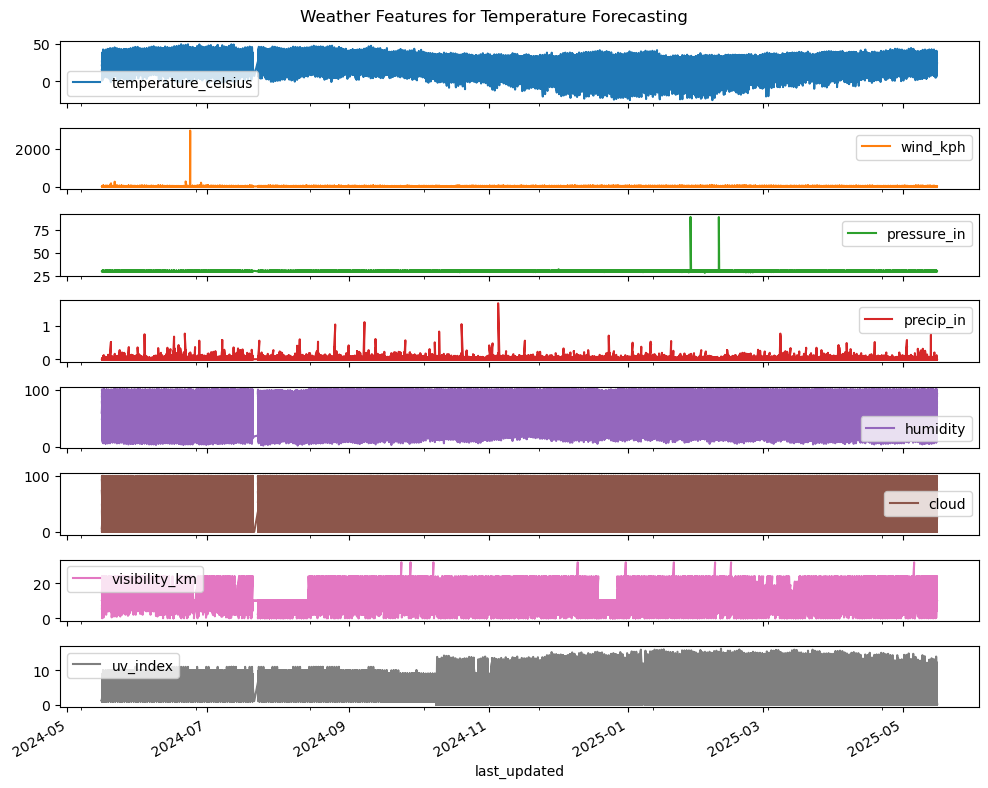

In [15]:
weather_df_num.plot(subplots=True, figsize=(10, 8), title="Weather Features for Temperature Forecasting")

plt.tight_layout()
plt.show()

current month temprature visualization

array([<Axes: xlabel='last_updated'>, <Axes: xlabel='last_updated'>,
       <Axes: xlabel='last_updated'>, <Axes: xlabel='last_updated'>,
       <Axes: xlabel='last_updated'>, <Axes: xlabel='last_updated'>,
       <Axes: xlabel='last_updated'>, <Axes: xlabel='last_updated'>],
      dtype=object)

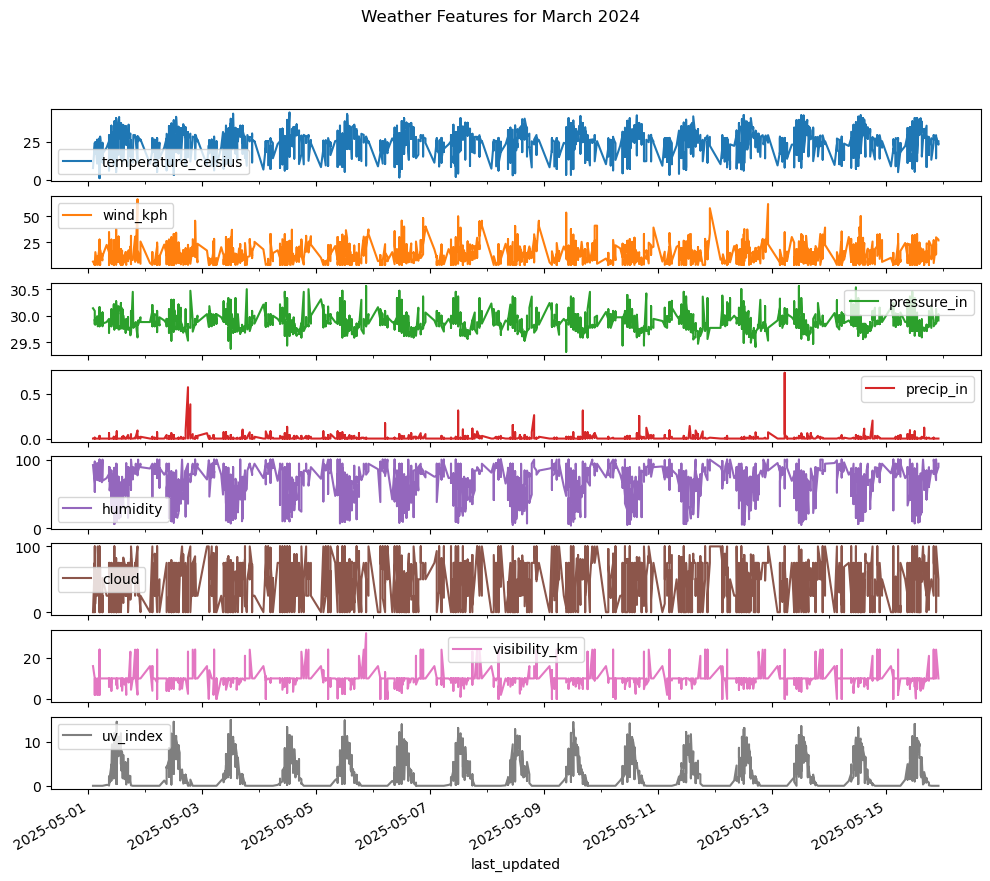

In [17]:
# Ensure datetime index and sorted order
weather_df_num = weather_df_num.sort_index()

# Slice for one month (e.g., March 2024)
df_march = weather_df_num.loc['2025-05-01':'2025-05-31']

# Plot numerical weather features for the selected month
df_march.plot(subplots=True, figsize=(12, 10), title="Weather Features for March 2024")

array([[<Axes: title={'center': 'temperature_celsius'}>,
        <Axes: title={'center': 'wind_kph'}>,
        <Axes: title={'center': 'pressure_in'}>],
       [<Axes: title={'center': 'precip_in'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>],
       [<Axes: title={'center': 'visibility_km'}>,
        <Axes: title={'center': 'uv_index'}>, <Axes: >]], dtype=object)

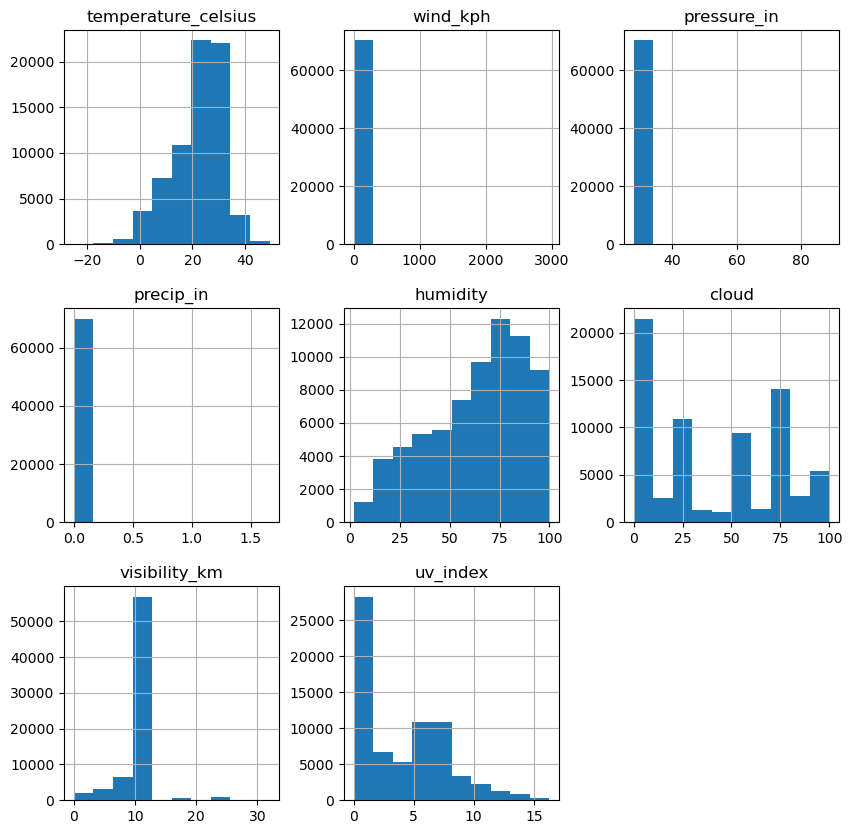

In [18]:
weather_df_num.hist(bins=10,figsize=(10,10))

In [19]:
weather_y=weather_df_num.pop("temperature_celsius")
weather_x=weather_df_num

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(weather_x,weather_y,test_size=0.2,shuffle=False)

In [21]:
X_train.shape

(56194, 7)

In [22]:
y_train.shape

(56194,)

Normalization

Apply Min-Max Scaling on train only, then transform test using same scaler

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ----- Scale numeric features -----
num_cols = X_train.select_dtypes(include='number').columns

scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

Multiple Linear Regression

In [27]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_lr = model.predict(X_test_scaled)

 DecisionTree

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

RandomForest

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
forest_model.fit(X_train_scaled, y_train)
y_pred_forest = forest_model.predict(X_test_scaled)

xgboost

In [33]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train_scaled, y_train)  # Use y_train_scaled if target scaled

y_pred_xgb = model.predict(X_test_scaled)

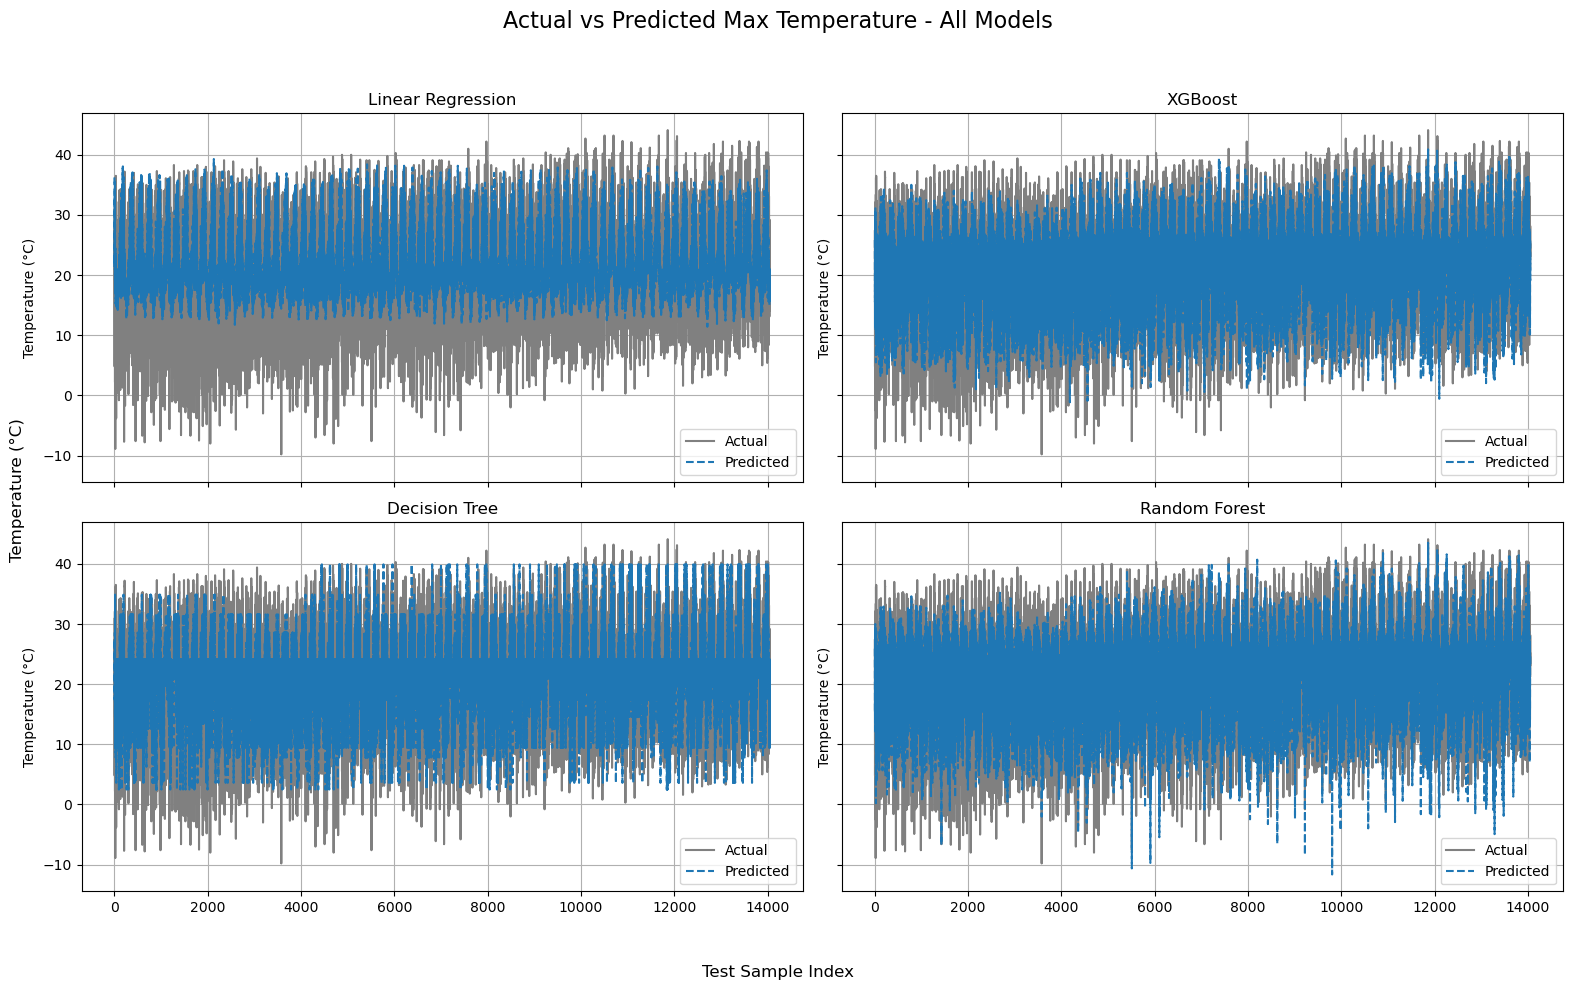

In [34]:

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)

# Set up model names and predictions
models = {
    'Linear Regression': y_pred_lr,
    'XGBoost': y_pred_xgb,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest
}

# Plot each model in its subplot
for ax, (model_name, y_pred) in zip(axes.flatten(), models.items()):
    ax.plot(y_test.values, label='Actual', color='grey')
    ax.plot(y_pred, label='Predicted', linestyle='--')
    ax.set_title(f'{model_name}')
    ax.set_ylabel('Temperature (°C)')
    ax.grid(True)
    ax.legend()

# Global title and labels
fig.suptitle('Actual vs Predicted Max Temperature - All Models', fontsize=16)
fig.supxlabel('Test Sample Index')
fig.supylabel('Temperature (°C)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [35]:
from sklearn.metrics import r2_score

# Define a helper function
def get_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Collect metrics for each model
results = {
    'Linear Regression': get_metrics(y_test, y_pred_lr),
    'Decision Tree': get_metrics(y_test, y_pred_tree),
    'Random Forest': get_metrics(y_test, y_pred_forest),
    'XGBoost': get_metrics(y_test, y_pred_xgb),
}

# Convert to DataFrame for tabular view
metrics_df = pd.DataFrame(results).T.round(2)  # transpose to get models as rows

# Display the table
print(metrics_df)

                    MAE    MSE  RMSE    R2
Linear Regression  6.83  64.33  8.02  0.11
Decision Tree      5.41  48.34  6.95  0.33
Random Forest      4.65  39.75  6.30  0.45
XGBoost            4.70  38.11  6.17  0.47


Observation:

 - XGBoost achieved the lowest MSE and RMSE, indicating the most accurate temperature predictions overall.

 - Random Forest was a close second, showing strong generalization and robustness.

 - Decision Tree improved significantly over Linear Regression but underperformed compared to ensemble methods.

 - Linear Regression performed the worst, with low R² (0.11), indicating it captured very little variance in the data.

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Randomized Search
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [38]:
# Predict on test data
y_pred_xgb_tuned = random_search.predict(X_test)



# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred_xgb_tuned)
r2 = r2_score(y_test, y_pred_xgb_tuned)

print(f"Tuned XGBoost RMSE: {rmse:.2f}")
print(f"Tuned XGBoost R2 Score: {r2:.2f}")

In [40]:
# Collect metrics for each model
results = {
    'Linear Regression': get_metrics(y_test, y_pred_lr),
    'Decision Tree': get_metrics(y_test, y_pred_tree),
    'Random Forest': get_metrics(y_test, y_pred_forest),
    'XGBoost': get_metrics(y_test, y_pred_xgb),
    'XGBoost Tuned' :get_metrics(y_test, y_pred_xgb_tuned),
}

# Convert to DataFrame for tabular view
metrics_df_tuned = pd.DataFrame(results).T.round(2)  # transpose to get models as rows

# Display the table
print(metrics_df_tuned)

                    MAE    MSE  RMSE    R2
Linear Regression  6.83  64.33  8.02  0.11
Decision Tree      5.41  48.34  6.95  0.33
Random Forest      4.65  39.75  6.30  0.45
XGBoost            4.70  38.11  6.17  0.47
XGBoost Tuned      4.28  34.69  5.89  0.52


feature importance

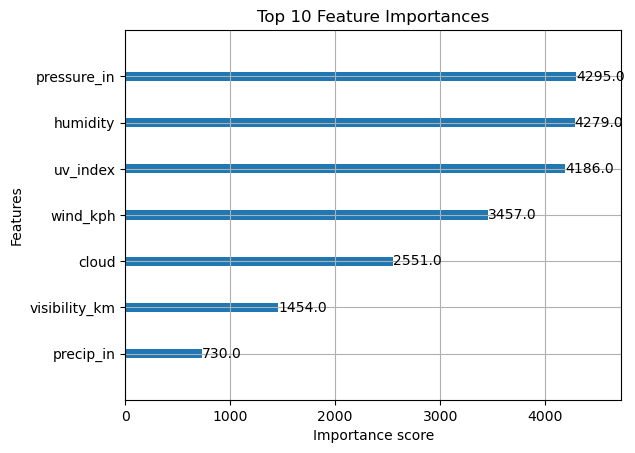

In [42]:
xgb.plot_importance(random_search.best_estimator_, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

Obervatoin:
 - based on feature importance above top features can be used for further model optimization.

In [44]:
important_features = ['last_updated','temperature_celsius','pressure_in', 'humidity', 'uv_index','wind_kph','cloud']  # replace with your actual features

# Select these columns from your dataframe
df_selected = df[important_features]

# Save to new CSV file
df_selected.to_csv('selected_features_weatherdata.csv', index=False)